In [1]:
import pandas as pd


## Spot

### EthereumPrice

In [23]:
ethereum_price = pd.read_csv("data\ethereumPrice.csv", index_col="timestamp")
ethereum_price.index = pd.to_datetime(ethereum_price.index, unit="s")


In [24]:
ethereum_price = ethereum_price.apply(
    lambda x: pd.to_numeric(x, errors="coerce"))


In [25]:
old_ethereum = ethereum_price.loc[: "2019-2-26"]


In [26]:
ethereum_price.dropna(inplace=True)


<AxesSubplot:xlabel='timestamp'>

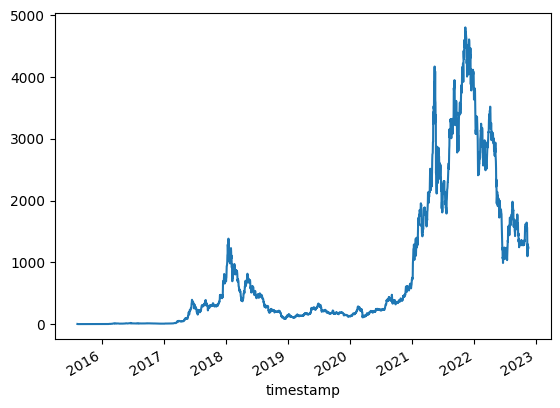

In [27]:
pd.concat([ethereum_price, old_ethereum])['open'].plot()


### Investing

In [28]:
investing = pd.read_csv(
    "data\Ethereum Historical Data - Investing.com.csv", index_col="Date")
investing.index = pd.to_datetime(investing.index)


In [29]:
investing.iloc[:, 0:4] = investing.iloc[:, 0:4].applymap(
    lambda x: x.replace(",", ""))


In [54]:
investing.iloc[:, 0:4] = investing.iloc[:, 0:4].apply(pd.to_numeric)


In [31]:
investing["Change"] = investing["Change %"].str.rstrip(
    '%').astype('float') / 100.0


In [52]:
investing["Vol."] = investing["Vol."].replace(
    {'B': '*1e9', 'K': '*1e3', 'M': '*1e6', '-': "0"}, regex=True).map(pd.eval)


In [55]:
investing.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2443 entries, 2022-11-16 to 2016-03-10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2443 non-null   float64
 1   Open      2443 non-null   float64
 2   High      2443 non-null   float64
 3   Low       2443 non-null   float64
 4   Vol.      2443 non-null   float64
 5   Change %  2443 non-null   object 
 6   Change    2443 non-null   float64
dtypes: float64(6), object(1)
memory usage: 217.2+ KB


### yahoo

In [34]:
yahoo_data = pd.read_csv("data\yahoo.csv", index_col="Date")
yahoo_data.index = pd.to_datetime(yahoo_data.index)

<AxesSubplot:xlabel='Date'>

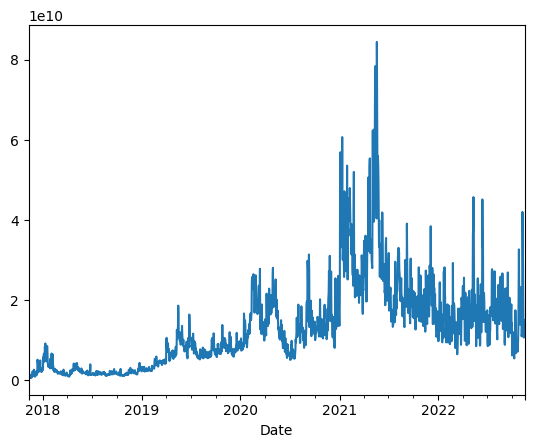

In [35]:
yahoo_data.Volume.plot()

### Binance

In [36]:
import glob
csv_dir = glob.glob(
    r"python/data/spot/monthly/klines/ETHUSDT/1m/2022-01-01_2022-07-01/unzip/*/*.csv")


In [37]:
binance = pd.concat((pd.read_csv(f, names=["Open time", "Open", "High", "Low", "Close", "Volume", "Close time", "Quote asset volume",
                    "Number of trades", "Taker buy base asset volume", "Taker buy quote asset volume", "Ignore"]) for f in csv_dir), ignore_index=True)


In [38]:
binance.index = pd.to_datetime(binance["Open time"], unit="ms")

In [39]:
binance.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 305280 entries, 2022-01-01 00:00:00 to 2022-07-31 23:59:00
Data columns (total 12 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Open time                     305280 non-null  int64  
 1   Open                          305280 non-null  float64
 2   High                          305280 non-null  float64
 3   Low                           305280 non-null  float64
 4   Close                         305280 non-null  float64
 5   Volume                        305280 non-null  float64
 6   Close time                    305280 non-null  int64  
 7   Quote asset volume            305280 non-null  float64
 8   Number of trades              305280 non-null  int64  
 9   Taker buy base asset volume   305280 non-null  float64
 10  Taker buy quote asset volume  305280 non-null  float64
 11  Ignore                        305280 non-null  int64  
dtypes: float64

### Analyze

C:\Users\wang\AppData\Local\Temp\ipykernel_40696\2405933347.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(ethereum_price.open, "k", color="r", label="EthereumPrice")
C:\Users\wang\AppData\Local\Temp\ipykernel_40696\2405933347.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  ax.plot(yahoo_data.Open, "k--", color="b", label="Yahoo")
C:\Users\wang\AppData\Local\Temp\ipykernel_40696\2405933347.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k." (-> color='k'). The keyword argument will take precedence.
  ax.plot(investing.Open, "k.", color="y", label="investing")


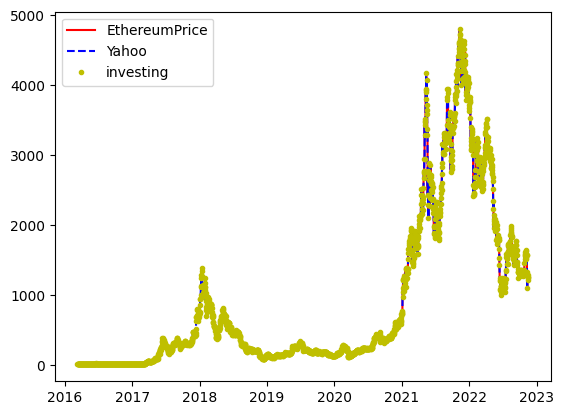

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(ethereum_price.open, "k", color="r", label="EthereumPrice")
ax.plot(yahoo_data.Open, "k--", color="b", label="Yahoo")
ax.plot(investing.Open, "k.", color="y", label="investing")
ax.legend(loc="best")

In [56]:
(ethereum_price['open'] - investing['Open']).dropna().describe()


count    1356.000000
mean        0.527483
std         4.415048
min       -43.669255
25%        -0.387686
50%         0.172739
75%         1.186820
max        34.037451
dtype: float64

In [57]:
(ethereum_price["open"] - yahoo_data["Open"]).dropna().describe()


count    1356.000000
mean       -0.360980
std         5.012673
min       -41.017079
25%        -1.441817
50%        -0.348343
75%         0.872702
max        49.083426
dtype: float64

In [58]:
(investing.Open - yahoo_data.Open).dropna().describe()


count    1834.000000
mean       -1.541900
std         5.063060
min       -53.559995
25%        -1.811721
50%        -0.731606
75%         0.064915
max        46.371660
Name: Open, dtype: float64

In [50]:
investing.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2443 entries, 2022-11-16 to 2016-03-10
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     2443 non-null   object 
 1   Open      2443 non-null   object 
 2   High      2443 non-null   object 
 3   Low       2443 non-null   object 
 4   Vol.      2443 non-null   float64
 5   Change %  2443 non-null   object 
 6   Change    2443 non-null   float64
dtypes: float64(2), object(5)
memory usage: 217.2+ KB


## Future

### MEXC

In [65]:
from datetime import datetime
from datetime import timedelta

start_date = datetime(2017, 11, 17)
end_date = datetime.now()
interval_days = (end_date - start_date).days


In [82]:
start_date + timedelta(1000)


datetime.datetime(2020, 8, 13, 0, 0)

In [83]:
def split_interval(start: datetime, end: datetime) -> list:
    interval_days = (end - start).days
    split_freq = interval_days // 1000
    remainder = interval_days % 1000

    split_list = []
    for i in range(split_freq + 1):
        split_timestamp = start_date + timedelta(1000) * i
        split_list.append(split_timestamp.timestamp())

    return split_list


In [86]:
f"{second_start:.0f}"


'1597248000'

In [87]:
def get_data(split_list: list, symbol: str) -> list:
    k_lines_api = "https://www.mexc.com/open/api/v2/market/kline"
    result_list = []
    for i in split_list:
        params = {
            "symbol": symbol,
            "interval": "1d",
            "start_time": f"{i:.0f}",
            "limit": 1000
        }

        data_json = requests.get(k_lines_api, params=params).json()
        result_list.extend(data_json["data"])

    return result_list


In [89]:
import requests

split_list = split_interval(start_date, end_date)

mexc_data = get_data(split_list, "ETH_USDT")

In [90]:
mexc = pd.DataFrame(mexc_data, columns=[
                    "time", "open", "close", "high", "low", "vol", "amount"])


In [92]:
mexc.index = pd.to_datetime(mexc.time, unit="s")


In [105]:
mexc.iloc[:, 1:7] = mexc.iloc[:, 1:7].apply(pd.to_numeric)

<AxesSubplot:xlabel='time'>

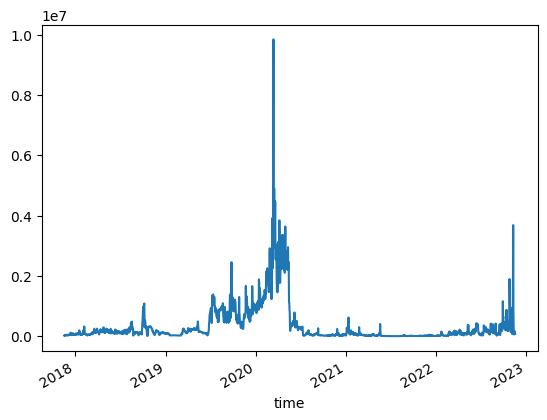

In [107]:
mexc.vol.plot()

In [106]:
mexc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2017-11-16 16:00:00 to 2022-11-17 00:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1825 non-null   int64  
 1   open    1825 non-null   float64
 2   close   1825 non-null   float64
 3   high    1825 non-null   float64
 4   low     1825 non-null   float64
 5   vol     1825 non-null   float64
 6   amount  1825 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 114.1 KB


### CME

In [5]:
import pandas_datareader as pdr
BTCX22 = pdr.yahoo.daily.YahooDailyReader("BTCX22.CME").read()

### Deribit

In [2]:
import requests

In [29]:
def get_deribit_data(symbol: str, interval: str, start: int, end: int) -> pd.DataFrame:
    base_url = "https://asia.deribit.com/api/v2/public/get_tradingview_chart_data"
    params = {
        "instrument_name": symbol,
        "start_timestamp": start,
        "end_timestamp": end,
        "resolution": interval
    }
    funture_json = requests.get(base_url, params=params).json()["result"]
    del funture_json["status"]
    funture_data = pd.DataFrame(funture_json)
    funture_data.index = pd.to_datetime(funture_data.ticks, unit="ms")
    funture_data.drop("ticks", inplace=True, axis=1)

    return funture_data


In [26]:
deribit_funture = get_deribit_data("BTC-4NOV22", "60", 1666339207000, 1667548800000)

In [27]:
deribit_option = get_deribit_data("ETH-14SEP22-1700-C", "60", 1662969660000, 1663142400000)

<AxesSubplot:xlabel='ticks'>

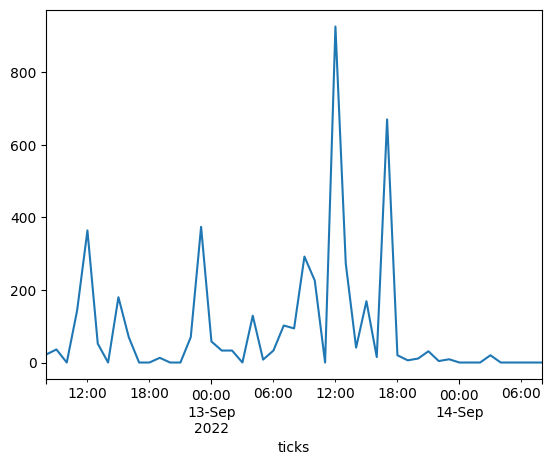

In [31]:
deribit_option.volume.plot()

In [23]:
deribit_funture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 337 entries, 2022-10-21 08:00:00 to 2022-11-04 08:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   volume  337 non-null    float64
 1   open    337 non-null    float64
 2   low     337 non-null    float64
 3   high    337 non-null    float64
 4   cost    337 non-null    float64
 5   close   337 non-null    float64
dtypes: float64(6)
memory usage: 18.4 KB


<AxesSubplot:xlabel='ticks'>

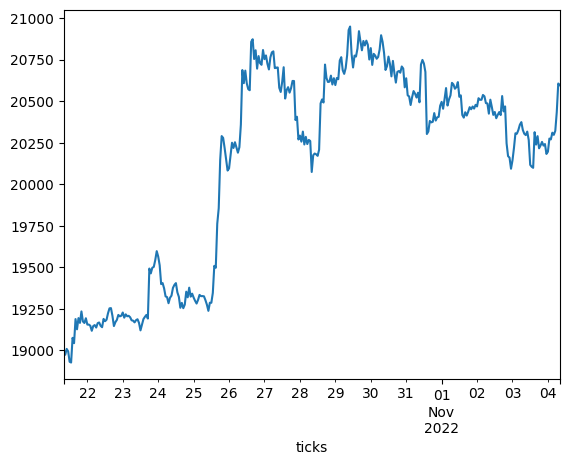

In [24]:
deribit_funture.open.plot()